In [1]:
%matplotlib inline

# Introduction

The Lanczos algorithm is a direct algorithm devised by Cornelius Lanczos that is an adaptation of power methods to find the $m$ "most useful" (tending towards extreme highest/lowest) eigenvalues and eigenvectors of an $n\times n$ Hermitian matrix, where $m$ is often but not necessarily much smaller than $n$.

The following is an implementation of the [standard Lanczos algorithm](https://en.wikipedia.org/wiki/Lanczos_algorithm).

# Import Dependencies

We begin by importing the necessary libraries.

In [11]:
# Data Analysis
import numpy as np 
from numpy import linalg as LA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('darkgrid')

# Lanczos Algorithm

The algorithm proceeds as follows:

1. Given a Hermitian matrix $A$ of size $n\times n$, and an arbitrary vector $v_1$ with Euclidean norm 1, specify a default number of function calls $m=n$
2. Let $w_1'$=$Av_1$
3. Let $\alpha_1=w_1'^* v_1$
4. Let $w_1=w_1'^*-\alpha_1 v_1$

We refer to steps 2 - 4 as the first iteration steps. Subsequently, 

5. Let $\beta_j=||w_{j-1}||$
6. If $\beta_j\neq0$, let $v_j=\frac{w_{j-1}}{\beta_j}$. Else, let $v_j$ be an arbitrary vector with Euclidean norm 1 that is orthogonal to $v_1, ..., v_{j-1}$
7. Let $w_j'=Av_j$
8. Let $\alpha_j=w_j'v_j$
9. Let $w_j=w_j'-\alpha_j v_j-\beta_j v_{j-1}$

where $j$ denotes the iteration number, and must satisfy $2\leq j\leq m$. Finally, the output is a tridiagonalized matrix $T$ with $\alpha_1, ..., \alpha_m$ along the main diagonal, and $\beta_2, ..., \beta_m$ along the super- and subdiagonals.

In [14]:
# Function to tri-diagonalize a matrix
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
  return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

# Lanczos algorithm
def lanczos(A, v1):
  np.set_printoptions(precision=3, suppress=True)
  # First iteration steps
  x, y = [], []
  n = A.shape[1]
  v2, beta = 0.0, 0.0

  for i in range(n):
    # Iteration steps (Spar på w)
    w_prime = np.dot(A, v1)
    conj = np.matrix.conjugate(w_prime)
    alpha = np.dot(conj, v1)
    w = w_prime - alpha * v1 - beta * v2
    beta = np.linalg.norm(w)
    x.append(np.linalg.norm(alpha))

    # Reset
    if i < (n-1):
        y.append(beta)
    v2 = v1
    v1 = w/beta
    
  return tridiag(y, x, y) #, w_array

# Example

We test our algorithm on an example where $A=\text{diag}\;(0,\;1,\;2,\;3,\;4,\;100000)$.

In [17]:
A = np.diag([0., 1., 2., 3., 4., 100000.])
n = A.shape[1]
v_0 = np.zeros(n)
v_0.fill(1.)
v = v_0 / np.linalg.norm(v_0)

# Obtaining the tri-diagonal matrix T
T = lanczos(A, v)
print(f'Tridiagonalization of A: \n{T}')

# Finding the eigenvalues w and eigenvectors v of the tri-diagonal matrix
w, v = LA.eig(T)
print(f'\nAssociated eigenvalues: \n{w}')
print(f'\nAssociated eigenvectors: \n{v}')

Tridiagonalization of A: 
[[16668.333 37267.054     0.        0.        0.        0.   ]
 [37267.054 83333.667     3.464     0.        0.        0.   ]
 [    0.        3.464     2.        1.183     0.        0.   ]
 [    0.        0.        1.183     2.        1.015     0.   ]
 [    0.        0.        0.        1.015   251.746  4991.161]
 [    0.        0.        0.        0.     4991.161 99750.252]]

Associated eigenvalues: 
[     0.025      1.274      3.975      2.726 100000.     99999.998]

Associated eigenvectors: 
[[ 0.426  0.485  0.426  0.485 -0.408 -0.   ]
 [-0.191 -0.217 -0.191 -0.217 -0.913 -0.   ]
 [ 0.652  0.273 -0.652 -0.273 -0.     0.   ]
 [-0.531  0.467 -0.531  0.467 -0.     0.   ]
 [ 0.272 -0.652 -0.272  0.652 -0.     0.05 ]
 [-0.014  0.033  0.014 -0.033 -0.     0.999]]


Let's visualize the eigenvalue convergence as a function of the number of iterations.

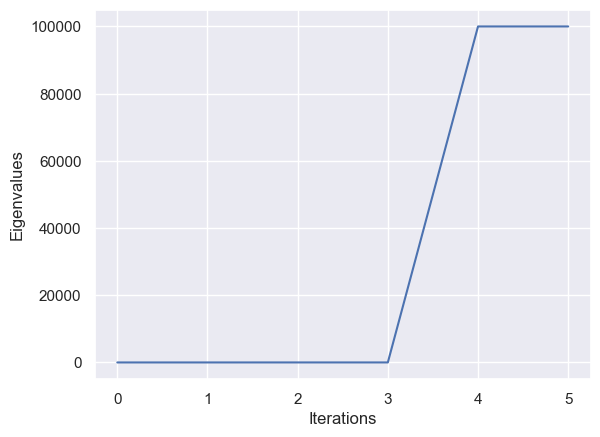

In [20]:
plt.plot(w)
plt.xlabel('Iterations')
plt.ylabel('Eigenvalues')
plt.show()

In [158]:
# Choose n (size of the matrix)
n = 150  

# Generate a random n x n matrix (non-Hermitian)
A = np.random.rand(n, n)

# Generate a random initial vector x
x = np.random.rand(n)

# Normalize x to have unit Euclidean norm
x = x / np.linalg.norm(x)

print("Random matrix A:\n", A)
print("\nRandom initial vector x:\n", x)

Random matrix A:
 [[0.254 0.571 0.924 ... 0.024 0.013 0.266]
 [0.162 0.497 0.783 ... 0.038 0.845 0.582]
 [0.21  0.028 0.862 ... 0.78  0.719 0.072]
 ...
 [0.432 0.741 0.998 ... 0.64  0.76  0.312]
 [0.862 0.278 0.074 ... 0.563 0.182 0.567]
 [0.54  0.216 0.491 ... 0.171 0.774 0.347]]

Random initial vector x:
 [0.01  0.052 0.027 0.081 0.025 0.015 0.096 0.016 0.033 0.035 0.115 0.024
 0.086 0.106 0.009 0.047 0.087 0.05  0.002 0.115 0.05  0.124 0.109 0.01
 0.015 0.012 0.058 0.068 0.073 0.063 0.136 0.092 0.005 0.008 0.094 0.091
 0.028 0.017 0.138 0.08  0.018 0.021 0.005 0.127 0.008 0.019 0.067 0.062
 0.138 0.048 0.052 0.136 0.025 0.118 0.062 0.134 0.059 0.011 0.134 0.035
 0.135 0.008 0.066 0.082 0.039 0.016 0.117 0.06  0.115 0.101 0.133 0.137
 0.01  0.099 0.07  0.034 0.133 0.093 0.067 0.045 0.139 0.045 0.02  0.023
 0.09  0.048 0.077 0.041 0.099 0.029 0.08  0.021 0.13  0.064 0.127 0.019
 0.04  0.135 0.138 0.098 0.02  0.107 0.118 0.107 0.123 0.136 0.125 0.106
 0.137 0.075 0.131 0.056 0.002 0.06

In [231]:
# Convert A to a Hermitian matrix
A = 0.5 * (A + np.conj(A.T))  # If A is real, A^* is just A.T

print("\nHermitian matrix A:\n", A)


Hermitian matrix A:
 [[0.254 0.366 0.567 ... 0.228 0.438 0.403]
 [0.366 0.497 0.405 ... 0.39  0.562 0.399]
 [0.567 0.405 0.862 ... 0.889 0.397 0.281]
 ...
 [0.228 0.39  0.889 ... 0.64  0.662 0.242]
 [0.438 0.562 0.397 ... 0.662 0.182 0.67 ]
 [0.403 0.399 0.281 ... 0.242 0.67  0.347]]


In [233]:
# Define k (much smaller than n)
k = 25  # Typically k << n

# Reusing the Lanczos algorithm from before
T = lanczos(A, x)[:k, :k]  # Extract the first k x k part of the matrix

print("\nTridiagonal matrix T:\n", T)


Tridiagonal matrix T:
 [[53.69  34.252  0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [34.252 21.309  2.838  0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     2.838  0.142  2.491  0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.     2.491  0.106  2.233  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     2.233  0.077  2.532  0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     2.532  0.06   2.615  0.     0.     0.
   0.     0.     0.     0. 

In [235]:
# Compute eigenvalues of A
eig_A, _ = LA.eig(A)

# Compute eigenvalues of T
eig_T, _ = LA.eig(T)

print("\nEigenvalues of A:\n", np.sort(eig_A))  # Sorted for better comparison
print("\nEigenvalues of T:\n", np.sort(eig_T))


Eigenvalues of A:
 [-4.732 -4.606 -4.552 -4.373 -4.21  -4.144 -3.993 -3.955 -3.858 -3.764
 -3.676 -3.636 -3.572 -3.527 -3.488 -3.358 -3.341 -3.259 -3.242 -3.074
 -3.038 -2.969 -2.885 -2.804 -2.762 -2.705 -2.676 -2.548 -2.525 -2.456
 -2.35  -2.322 -2.28  -2.24  -2.194 -2.137 -2.041 -1.996 -1.959 -1.903
 -1.871 -1.781 -1.759 -1.689 -1.617 -1.527 -1.509 -1.396 -1.39  -1.323
 -1.276 -1.232 -1.217 -1.092 -1.087 -1.043 -1.032 -0.857 -0.787 -0.755
 -0.699 -0.673 -0.601 -0.571 -0.477 -0.461 -0.439 -0.409 -0.313 -0.288
 -0.272 -0.109 -0.063 -0.06  -0.037  0.036  0.13   0.149  0.196  0.241
  0.271  0.374  0.404  0.459  0.493  0.522  0.652  0.683  0.714  0.777
  0.813  0.903  0.938  0.953  0.985  1.077  1.147  1.165  1.237  1.281
  1.304  1.37   1.489  1.516  1.574  1.647  1.68   1.699  1.773  1.824
  1.902  1.91   2.016  2.052  2.066  2.126  2.177  2.262  2.35   2.451
  2.517  2.633  2.679  2.696  2.792  2.836  2.947  3.001  3.08   3.103
  3.214  3.278  3.316  3.399  3.508  3.576  3.657  3.736 

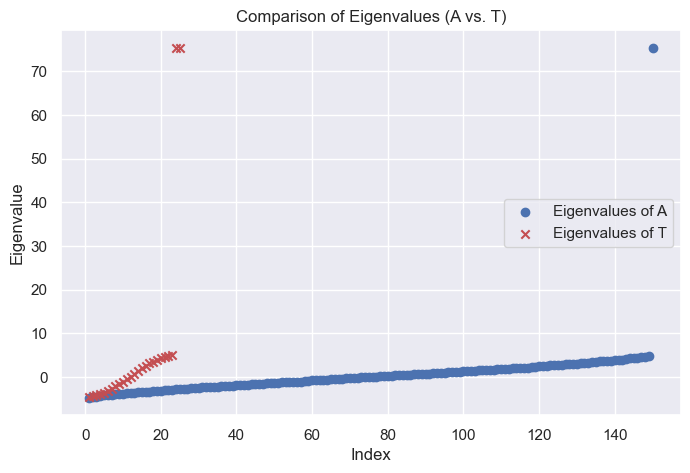

In [237]:
plt.figure(figsize=(8,5))

# Plot all eigenvalues of A
plt.scatter(range(1, len(eig_A) + 1), np.sort(eig_A), label="Eigenvalues of A", color='b', marker='o')

# Plot eigenvalues of T
plt.scatter(range(1, len(eig_T) + 1), np.sort(eig_T), label="Eigenvalues of T", color='r', marker='x')

plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Comparison of Eigenvalues (A vs. T)")
plt.legend()
plt.grid(True)
plt.show()

In [239]:
print("-" * 20 + " First Values " + "-" * 20)
print("\nFirst Eigenvalue for A:\n", np.sort(eig_A)[0])
print("\nFirst Eigenvalue for T:\n", np.sort(eig_T)[0])

print("-" * 20 + " Last Values " + "-" * 20)
print("\nLast Eigenvalue for A:\n", np.sort(eig_A)[-1])
print("\nLast Eigenvalue for T:\n", np.sort(eig_T)[-1])


-------------------- First Values --------------------

First Eigenvalue for A:
 -4.731789067293855

First Eigenvalue for T:
 -4.535719676874489
-------------------- Last Values --------------------

Last Eigenvalue for A:
 75.41580137080436

Last Eigenvalue for T:
 75.41615086710559


In [241]:
print(np.sort(eig_A)[0:5])

[-4.732 -4.606 -4.552 -4.373 -4.21 ]


In [243]:
print(np.sort(eig_T)[0:5])

[-4.536 -4.429 -4.211 -3.825 -3.59 ]


In [245]:
print(np.sort(eig_A)[(n-5):n])

[ 4.485  4.557  4.639  4.871 75.416]


In [247]:
print(np.sort(eig_T)[(k-5):k])

[ 4.549  4.809  4.954 75.416 75.416]


In [271]:
np.trace(np.matmul(np.conj(A.T), A))

6607.492590812457

In [273]:
np.sum(np.conj(A)*A)

6607.492590812457